Hammersley Sampler

https://blog.csdn.net/i_dovelemon/article/details/76599923

https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-in-practice/introduction-quasi-monte-carlo

http://holger.dammertz.org/stuff/notes_HammersleyOnHemisphere.html

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pylab
%matplotlib inline

def vanDerCorput(n, base = 2):
    ret = 0
    invBase = 1 / base
    while n != 0:
        ret += (n & 1) * invBase
        n = int(n / 2)
        invBase /= base
    return ret

def radicalInverseBase2(n):
    return vanDerCorput(n, 2)

def hammersleySampler(num):
    X = []
    Y = []
    for i in range(num):
        x = i / num
        y = radicalInverseBase2(i)
        X.append(x)
        Y.append(y)
    return X, Y

def mapper_hemisphere_uniform(u, v):
    phi = 2.0 * np.pi * v
    cosTheta = 1 - u
    sinTheta = math.sqrt(1.0 - cosTheta * cosTheta)
    x = math.cos(phi) * sinTheta
    y = math.sin(phi) * sinTheta
    z = cosTheta
    return x, y, z

def hemisphereCoordinates(num):
    U,V = hammersleySampler(num)
    X,Y,Z = [],[],[]
    for i in range(num):
        x,y,z = mapper_hemisphere_uniform(U[i],V[i])
        X.append(x)
        Y.append(y)
        Z.append(z)        
    return X, Y, Z

def plotHammersley(num):
    X, Y = hammersleySampler(num)
    plt.scatter(X, Y, s=5, cmap=plt.cm.Spectral, marker='o')
    plt.show()
    
def plotHammersleyHemisphere(num):
    X, Y, Z = hemisphereCoordinates(num)
    plt.scatter(X, Y, c=Z, s=5, cmap=plt.cm.Spectral, marker='o')
    plt.show()

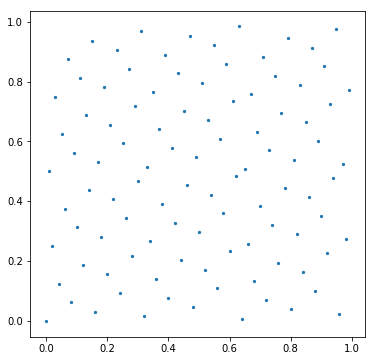

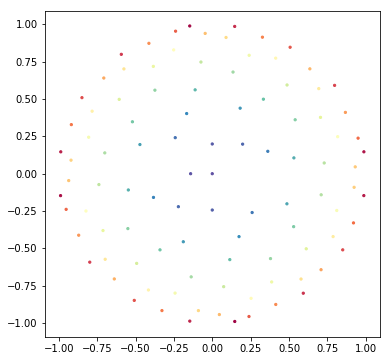

In [46]:
pylab.rcParams['figure.figsize'] = (6.0, 6.0)

plotHammersley(100)
plotHammersleyHemisphere(100)